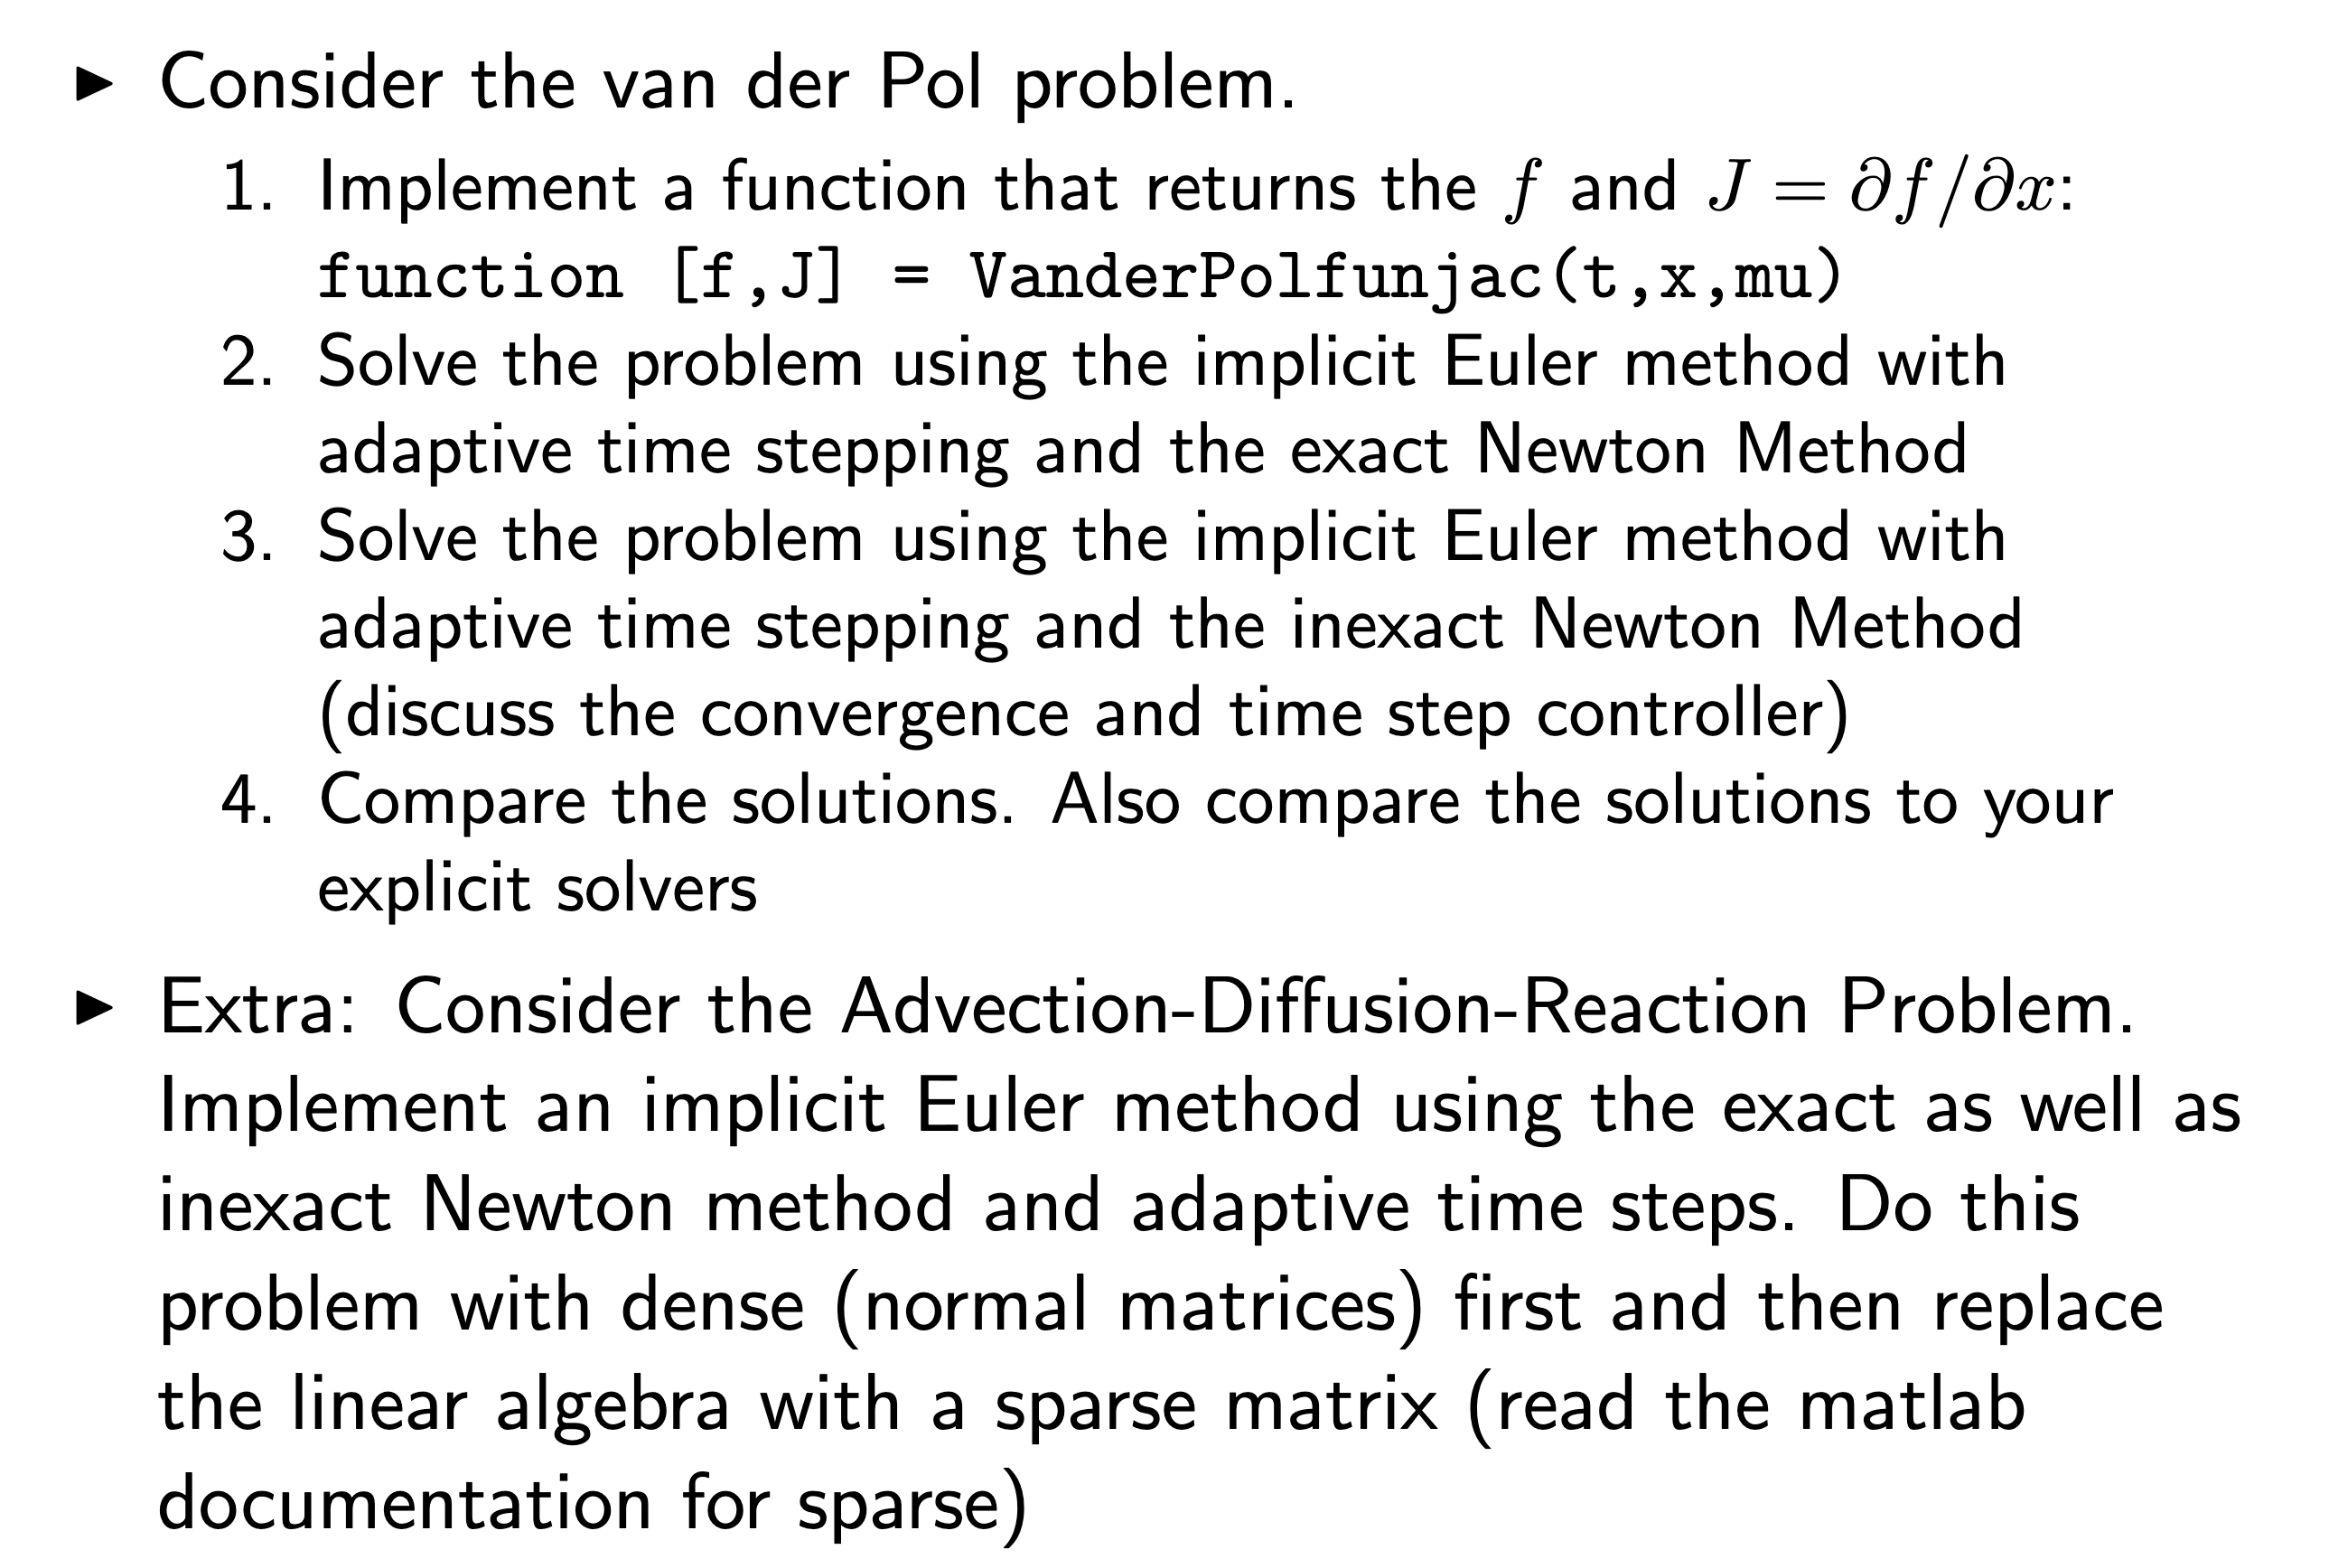

# Implicit Euler method

## with adaptive time stepping

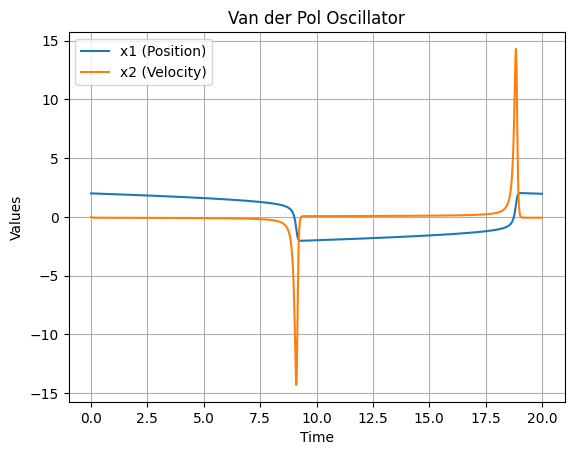

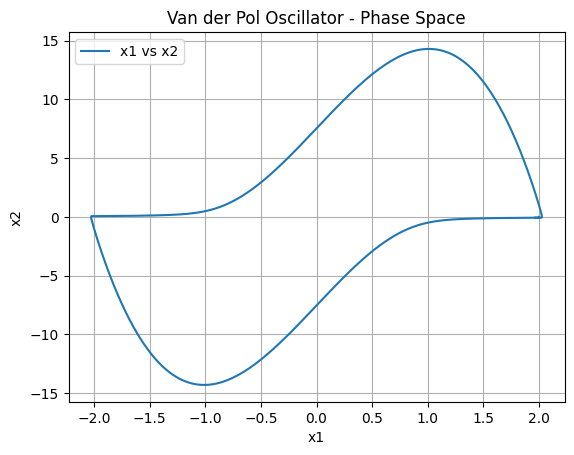

In [1]:

import numpy as np
import matplotlib.pyplot as plt


def explicit_euler_fixed_step_size(fun, t0, tN, N, x0, *args):
    dt = (tN - t0) / N
    nx = len(x0)

    X = np.zeros((N+1, nx))
    T = np.zeros(N+1)

    # Euler's Explicit Method
    T[0] = t0
    X[0, :] = x0

    for k in range(N):
        f = np.array(fun(T[k], X[k, :], *args))
        T[k+1] = T[k] + dt
        X[k+1, :] = X[k, :] + f * dt

    return T, X

def VanDerPol(t, x, mu):
    x1_ = x[1]
    x2_ = mu * (1 - x[0]**2) * x[1] - x[0]
    return [x1_, x2_]

mu = 10
x0 = np.array([2.0, 0.0])
t_span = (0, 20)
t0 = t_span[0]
TN = t_span[1]
N = 10000


# Solve the ODE
T, X = explicit_euler_fixed_step_size(VanDerPol, t0, TN, N, x0, mu)

# Plot the solution
plt.figure()
plt.plot(T, X[:, 0], label='x1 (Position)')
plt.plot(T, X[:, 1], label='x2 (Velocity)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.title('Van der Pol Oscillator')
plt.grid()
plt.show()

plt.figure()
plt.plot(X[:, 0], X[:, 1], label='x1 vs x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Van der Pol Oscillator - Phase Space')
plt.grid()
plt.show()


In [ ]:
## Newtons 
# Exact 

def newtons_method_ode(FunJac, tk, xk, dt, xinit, tol, maxit, *args):
    k = 0
    t = tk + dt
    x = np.array(xinit, dtype=float)

    f, J = FunJac(t, x, *args)
    R = x - f * dt - xk
    I = np.eye(len(xk))

    while k < maxit and np.linalg.norm(R, np.inf) > tol:
        k += 1
        dRdx = I - J * dt
        dx = np.linalg.solve(dRdx, R)
        x -= dx
        f, J = FunJac(t, x, *args)
        R = x - dt * f - xk

    return x
# Inexact 

def newtons_method_inexact(FunJac, tk, xk, dt, xinit, tol, maxit, *args):
    k = 0
    t = tk + dt
    x = np.array(xinit, dtype=float)

    f, J = FunJac(t, x, *args)
    R = x - f * dt - xk
    I = np.eye(len(xk))
    
    while k < maxit and np.linalg.norm(R, np.inf) > tol:
        k += 1
        dRdx = I - J * dt
        dx = np.linalg.solve(dRdx, R)
        x -= dx
        #f, J = FunJac(t, x, *args)
        alpha=np.linalg.norm(x - dt * f - xk, np.inf)/np.linalg.norm(R,np.inf)
        if alpha > 1:
            break
        R = x - dt * f - xk
    return x


In [ ]:
import numpy as np
import matplotlib.pyplot as plt




def VanDerPol_fun_jac(t, x, mu):
    x1_ = x[1]
    x2_ = mu * (1 - x[0]**2) * x[1] - x[0]

    J = np.array([
        [0, 1],
        [-2 * mu * x[0] * x[1] - 1, mu * (1 - x[0]**2)]
    ])

    return np.array([x1_, x2_]), J



x0 = np.array([2, 0])
t_span = (0, 10)

t0 = t_span[0]
TN = t_span[1]

N = 10000
mu = 1.0
x0 = np.array([2.0, 2.0])

t_span = (0, 10)

t0 = t_span[0]
tN = t_span[1]

dt = 0.01
N = int((tN - t0) / dt)
tol = 1e-6
maxit = 200

T = np.linspace(t0, tN, N+1)
X = np.zeros((N+1, len(x0)))
X[0, :] = x0

# Solve the ODE using Implicit Euler



for k in range(N):
    X[k+1, :] = newtons_method_ode(VanDerPol_fun_jac, T[k], X[k, :], dt, X[k, :], tol, maxit, mu)

# Plot the solution
plt.figure()
plt.plot(T, X[:, 0], label='x1 (Position)')
plt.plot(T, X[:, 1], label='x2 (Velocity)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(X[:, 0], X[:, 1], label='x1 vs x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Van der Pol Oscillator - Phase Space')
plt.grid()
plt.show()




In [ ]:
import numpy as np

###chat gbt løsning der er strutureret pænere end min

def implicit_euler_fixed_step(fun_jac, ta, tb, N, xa, *args):
    # Compute step size and allocate memory
    dt = (tb - ta) / N
    nx = xa.shape[0]
    X = np.zeros((N + 1, nx))
    T = np.zeros(N + 1)

    # Tolerance and max iterations for Newton’s method
    tol = 1e-8
    maxit = 100

    # Initial conditions
    T[0] = ta
    X[0, :] = xa

    # Implicit Euler loop
    for k in range(N):
        f, _ = fun_jac(T[k], X[k, :], *args)
        T[k + 1] = T[k] + dt
        x_init = X[k, :] + dt * f  # Initial guess for Newton's method
        X[k + 1, :] = newtons_method_ode(fun_jac, T[k], X[k], dt, x_init, tol, maxit, *args)

    return T, X

def newtons_method_ode(fun_jac, t, x, dt, x_init, tol, maxit, *args):
    
    x_new = x_init
    for _ in range(maxit):
        f, J = fun_jac(t + dt, x_new, *args)
        F = x_new - x - dt * f  # Residual equation
        if np.linalg.norm(F) < tol:
            return x_new
        J_implicit = np.eye(len(x)) - dt * J  # Implicit Euler Jacobian
        delta_x = np.linalg.solve(J_implicit, -F)  # Solve Newton step
        x_new += delta_x  # Update solution
    return x_new  # Return last computed valu
    
    
# Define the Van der Pol function and Jacobian
def VanDerPol_fun_jac(t, x, mu):
    x1_ = x[1]
    x2_ = mu * (1 - x[0]**2) * x[1] - x[0]

    J = np.array([
        [0, 1],
        [-2 * mu * x[0] * x[1] - 1, mu * (1 - x[0]**2)]
    ])

    return np.array([x1_, x2_]), J

# Parameters
mu = 1.0
x0 = np.array([2.0, 2.0])
t_span = (0, 10)
N = 10000

# Solve using Implicit Euler
T, X = implicit_euler_fixed_step(VanDerPol_fun_jac, t_span[0], t_span[1], N, x0, mu)

# Plot results
import matplotlib.pyplot as plt

plt.figure()
plt.plot(T, X[:, 0], label='x1 (Position)')
plt.plot(T, X[:, 1], label='x2 (Velocity)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(X[:, 0], X[:, 1], label='x1 vs x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Van der Pol Oscillator - Phase Space')
plt.grid()
plt.show()



## with adaptive time stepping

In [ ]:
def implicit_euler_adaptive_step(fun_jac, t0, tf, x0,h0,abstol, reltol, *args):
    # Error controller parameters
    epstol=0.8
    facmin = 0.1  # Maximum decrease factor
    facmax = 5.0  # Maximum increase factor
    # Compute step size and allocate memory
    
    nx = x0.shape[0]
    X = np.zeros((N + 1, nx))
    T = np.zeros(N + 1)
    
    # Tolerance and max iterations for Newton’s method
    tol = 1e-8
    maxit = 100

    # Initial conditions
    t= t0
    x = np.array(x0, dtype=float)
    h = h0
   
  # Counters
    nfun = 0
    naccept = 0
    nreject = 0

    # Output storage
    T = np.array([t])  # Ensure T is a 1D NumPy array
    X = np.array([x])  # Ensure X is a 2D NumPy array

        # Algorithm
    while t < tf:
        if t + h > tf:
            h = tf - t

        
        f, J = np.array(fun_jac(t, x, *args)) #måske stå her, måske ikke  # Ensure f is a NumPy array
        #x_init=x+f*h
        #x=newtons_method_ode(fun_jac(t, x, *args), t, x, h, x_init, tol, maxit, *args)

        AcceptStep = False

        while not AcceptStep:

        ##normal step: 
        #f, _ = fun_jac(T[k], X[k, :], *args)
        #T[k + 1] = T[k] + dt
        #x_init = X[k, :] + dt * f  # Initial guess for Newton's method
        #X[k + 1, :] = newtons_method_ode(fun_jac, T[k], X[k], dt, x_init, tol, maxit, *args)
            

            x1_init = x + h * f
            x1 = newtons_method_ode(fun_jac, t, x, h, x1_init, tol, maxit, *args) 


            #half step
            hm = 0.5 * h
            tm = t + hm
            xm_init = x + hm * f


            xm = newtons_method_ode(fun_jac, tm, x, hm, xm_init, tol, maxit, *args)
            
            
            
            #to step final solution
            fm, _ = np.array(fun_jac(t, x, *args))
            x1hat = xm + hm * fm

            x1hat_final = newtons_method_ode(fun_jac, tm, xm, hm, x1hat, tol, maxit, *args)

            # Error estimation
            e = x1hat_final - x1
            denom = np.maximum(abstol, np.abs(x1hat) * reltol)  # Fix element-wise max
            
            r = np.max(np.abs(e) / denom)  # Compute max ratio

            AcceptStep = r <= epstol

            if AcceptStep:
                t = t + h
                x = x1hat

                naccept += 1
                T = np.append(T, t)  # Append t to the 1D array
                X = np.vstack([X, x1hat.reshape(1, -1)])  # Ensure correct shape
            else:
                nreject += 1

            h = np.max([facmin, np.min([np.sqrt(epstol / r), facmax])]) * h


    return (T,X)


In [ ]:
reltol=1e-3
abstol=1e-3
h0=1e-6
ta=0
tb=40
x0=np.array([2.0,1.0])
mu=10



T, X = implicit_euler_adaptive_step(VanDerPol,ta, tb, x0, h0, abstol, reltol, mu)

In [ ]:
plt.figure()
plt.plot(T, X[:, 0], label='x1 (Position)')
plt.plot(T, X[:, 1], label='x2 (Velocity)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(X[:, 0], X[:, 1], label='x1 vs x2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Van der Pol Oscillator - Phase Space')
plt.grid()
plt.show()

In [ ]:
def normal_implicit_step():
        
        f, _ = fun_jac(T[k], X[k, :], *args)
        T[k + 1] = T[k] + dt
        x_init = X[k, :] + dt * f  # Initial guess for Newton's method
        X[k + 1, :] = newtons_method_ode(fun_jac, T[k], X[k], dt, x_init, tol, maxit, *args)